Iteraciones: 60
Último punto: [-3.4657359e-01  5.4204316e-09]
Último f(x): 2.5592666966582156
Paso mínimo usado: 0.0078125  | paso máximo usado: 0.5


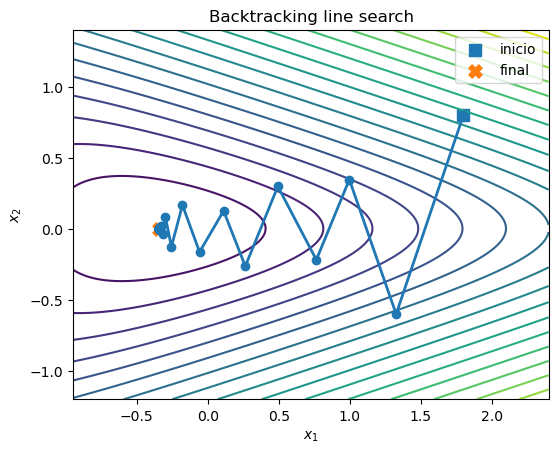

In [ ]:
#Backtracking line search 
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    x1, x2 = x
    return np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)

def grad_f(x):
    x1, x2 = x
    e1 = np.exp(x1 + 3*x2 - 0.1)
    e2 = np.exp(x1 - 3*x2 - 0.1)
    e3 = np.exp(-x1 - 0.1)
    df_dx1 = e1 + e2 - e3
    df_dx2 = 3*e1 - 3*e2
    return np.array([df_dx1, df_dx2], dtype=float)

#Backtracking line search
def backtracking(x, p, c=1e-4, rho=0.5, t0=1.0, max_backtracks=50):
    #Busca t tal que: f(x + t p) <= f(x) + c t grad(x)^T p
    t = t0
    fx = f(x)
    g = grad_f(x)
    gp = np.dot(g, p)  # g^T p (debe ser negativo si p es descenso)

    # Si por alguna razón p no es dirección de descenso, se hace p=-g
    if gp >= 0:
        p = -g
        gp = np.dot(g, p)

    for _ in range(max_backtracks):
        if f(x + t*p) <= fx + c*t*gp:
            return t
        t *= rho

    return t  # si no encontró, regresa el t chiquito que quedó

#Gradient descent con backtracking
def gd_backtracking(x0, max_iter=50, eps=1e-6, c=1e-4, rho=0.5, t0=1.0):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    steps = []

    for k in range(max_iter):
        g = grad_f(x)
        gnorm = np.linalg.norm(g)
        if gnorm < eps:
            break

        p = -g
        t = backtracking(x, p, c=c, rho=rho, t0=t0)
        x = x + t*p

        path.append(x.copy())
        steps.append(t)

    return np.array(path), np.array(steps)

#Contornos + trayectoria
def plot_contornos_y_pasos(path, margin=0.6):
    x1_min, x1_max = path[:,0].min()-margin, path[:,0].max()+margin
    x2_min, x2_max = path[:,1].min()-margin, path[:,1].max()+margin

    x1 = np.linspace(x1_min, x1_max, 400)
    x2 = np.linspace(x2_min, x2_max, 300)
    X1, X2 = np.meshgrid(x1, x2)

    Z = np.exp(X1 + 3*X2 - 0.1) + np.exp(X1 - 3*X2 - 0.1) + np.exp(-X1 - 0.1)

    plt.figure(figsize=(9,4.8))
    plt.contour(X1, X2, np.log(Z), levels=20)
    plt.plot(path[:,0], path[:,1], marker="o", linewidth=2)
    plt.scatter(path[0,0], path[0,1], s=70, marker="s", label="inicio")
    plt.scatter(path[-1,0], path[-1,1], s=90, marker="X", label="final")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Backtracking line search")
    plt.legend()
    plt.show()

#Prueba
if __name__ == "__main__":
    #np.random.seed(42)
    #x0 = np.random.uniform(-5, 5, size=2)
    x0=(1.8,0.8)
    path, steps = gd_backtracking(x0, max_iter=60, eps=1e-8, c=1e-4, rho=0.5, t0=1.0)

    print("Iteraciones:", len(path) - 1)
    print("Último punto:", path[-1])
    print("Último f(x):", f(path[-1]))
    if len(steps) > 0:
        print("Paso mínimo usado:", steps.min(), " | paso máximo usado:", steps.max())

    plot_contornos_y_pasos(path)

Punto inicial aleatorio: (2.0399977691414293, 3.150172624899575)
k=00  x=(2.0400,3.1502)  f=101.316671  ||g||=6.304e+01
k=01  x=(1.8768,-1.8901)  f=37.486101  ||g||=3.785e+01
k=02  x=(1.7267,1.1341)  f=14.351637  ||g||=2.275e+01
k=03  x=(1.5885,-0.6804)  f=5.891650  ||g||=1.370e+01
k=04  x=(1.4614,0.4083)  f=2.734685  ||g||=8.295e+00
k=05  x=(1.3445,-0.2450)  f=1.503915  ||g||=5.080e+00
k=06  x=(1.2370,0.1470)  f=0.981053  ||g||=3.189e+00
k=07  x=(1.1380,-0.0882)  f=0.725294  ||g||=2.099e+00
k=08  x=(1.0470,0.0529)  f=0.576064  ||g||=1.489e+00
k=09  x=(0.9632,-0.0317)  f=0.473963  ||g||=1.154e+00
k=10  x=(0.8862,0.0190)  f=0.396260  ||g||=9.646e-01
k=11  x=(0.8153,-0.0114)  f=0.333630  ||g||=8.467e-01
k=12  x=(0.7500,0.0069)  f=0.281749  ||g||=7.625e-01
k=13  x=(0.6900,-0.0041)  f=0.238244  ||g||=6.949e-01
k=14  x=(0.6348,0.0025)  f=0.201567  ||g||=6.367e-01
k=15  x=(0.5840,-0.0015)  f=0.170577  ||g||=5.848e-01
k=16  x=(0.5373,0.0009)  f=0.144366  ||g||=5.376e-01
k=17  x=(0.4943,-0.000

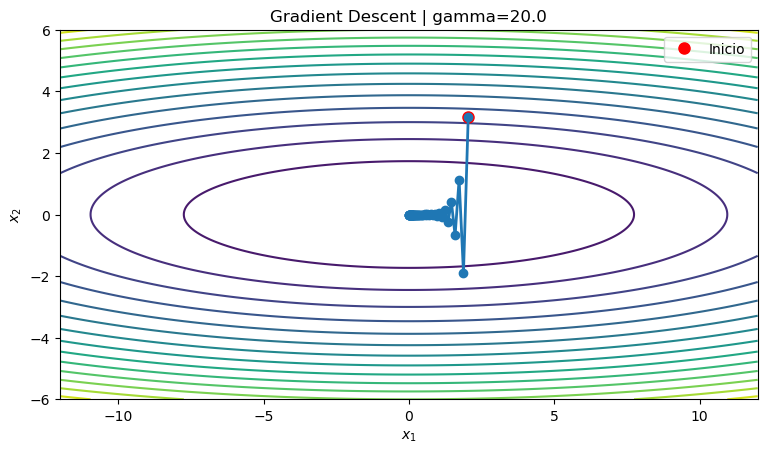

In [ ]:
#Example con función cuadrática
import numpy as np
import matplotlib.pyplot as plt

# función y gradiente
def f(x1, x2, gamma):
    return 0.5*(x1**2 + gamma*x2**2)

#aqui el gradiente es el vector de derivadas parciales
def grad(x, gamma):
    x1, x2 = x
    return np.array([x1, gamma*x2], dtype=float)

# gradient descent
def gd_path(x0, alpha, gamma, max_iter=50, eps=1e-6):
    x = np.array(x0, dtype=float)
    path = [x.copy()]

    for k in range(max_iter):
        g = grad(x, gamma)
        gnorm = np.linalg.norm(g)
        fx = f(x[0], x[1], gamma)

        print(f"k={k:02d}  x=({x[0]:.4f},{x[1]:.4f})  f={fx:.6f}  ||g||={gnorm:.3e}")

        if gnorm < eps:
            break

        x = x - alpha*g
        path.append(x.copy())

    return np.array(path)

#plot de los contornos y los pasos
def plot_contornos_y_pasos(path, gamma):
    x1 = np.linspace(-12, 12, 400)
    x2 = np.linspace(-6, 6, 300)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2, gamma)

    plt.figure(figsize=(9,4.8))
    plt.contour(X1, X2, Z, levels=15)
    plt.plot(path[0,0], path[0,1], 'ro', markersize=8, label="Inicio")
    plt.plot(path[:,0], path[:,1], marker="o", linewidth=2)
    plt.legend()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(f"Gradient Descent | gamma={gamma}")
    plt.show()

def random_x0(x1_range=(-12,12), x2_range=(-6,6)):
    x1 = np.random.uniform(*x1_range)
    x2 = np.random.uniform(*x2_range)
    return (x1, x2)
#Prueba
gamma = 20.0         #forma del valle
alpha = 0.08         #paso que se ajusta
#coordenada inicial la generamos aleatoriamente
x0 = random_x0()
print("Punto inicial aleatorio:", x0)
path = gd_path(x0, alpha, gamma, max_iter=60, eps=1e-6)
print("Pasos ejecutados:", len(path)-1)
print("Ultimo punto:", path[-1])
#imprime el camino recorrido
plot_contornos_y_pasos(path, gamma)